# Aula 3 - Regressão linear

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Regressão linear simples
- 3) Regressão linear múltipla
- 4) Overfitting: um dos lados do tradeoff viés-variância

____
____
____

## 1) Introdução

Imagine que você quer vender sua casa.

Você sabe os atributos da sua casa: quantos cômodos têm, quantos carros cabem na garagem, qual é a área construída, qual sua localidade, etc.

Agora, a pergunta é: qual seria o melhor preço pra você colocá-la a venda, ou seja, quanto de fato ela vale?

Você pode solicitar a avaliação de um corretor de imóveis (contando com a experiência dele), ou então...

...fazer um modelo de **Machine Learning**, que, com base nos atributos e preços de diversas outras casas, pode fazer uma **predição** sobre o preço adequado da sua casa!

Para resolver este problema, podemos utilizar um dos mais simples e importantes algoritmos de machine learning: a **Regressão Linear!**

____

Para introduzirmos as ideias, vamos usar um [dataset de preço de casas](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Esta base de dados contém **79 features** (+ 1 ID), que são as características de cada uma das casas listadas; e **1 target**, que é o preço pelo qual aquela casa foi vendida.

Por termos o target disponível, estamos trabalhando com um problema de **aprendizagem supervisionada**.

Para o significado de cada uma das features, e os valores que elas podem assumir, veja a página acima.

**Vamos ler a base e começar a explorá-la!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("datasets/house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.size, data.shape

(118260, (1460, 81))

In [4]:
data.isna().sum().sum()

6965

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Por enquanto, não vamos nos preocupar com os dados missing, pois vamos usar apenas uma feature no nosso modelo inicial.

Aproveite para depois explorar os dados da forma que quiser!

Por enquanto, vamos dar uma olhada na coluna target!

In [7]:
# Tudo menos Id e SalePrice (Id é aleatório e SalePrice é o target)
features = data.drop(columns = ["Id", "SalePrice"])
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
target = data["SalePrice"]
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, data["SalePrice"], test_size = 0.2, random_state = 42)

In [10]:
X_test.shape

(292, 79)

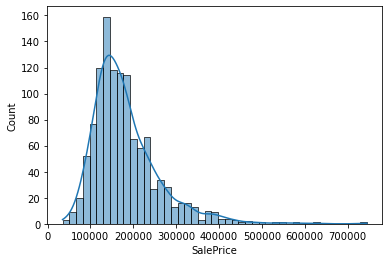

In [11]:
sns.histplot(y_train, kde = True);

In [12]:
y_train.describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

Tomar o log de distribuições enviesadas tende a diminuir o desvio:

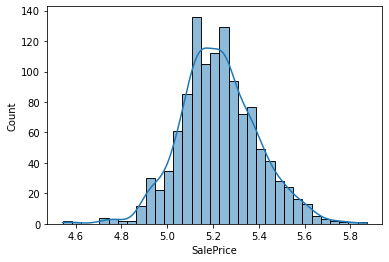

In [13]:
#plt.figure(figsize = (12,12))
sns.histplot(np.log10(y_train),kde = True);

In [14]:
np.log10(y_train).skew()

0.12487950942383513

In [15]:
X_train.shape

(1168, 79)

Fica evidente que a distribuição é desviada para a direita.

Vamos tentar alterar isso na próximas versões do modelo para ver se teremos ganhos de performance!

Por enquanto, seguimos assim.

Vamos agora dar uma olhada na correlação das variáveis

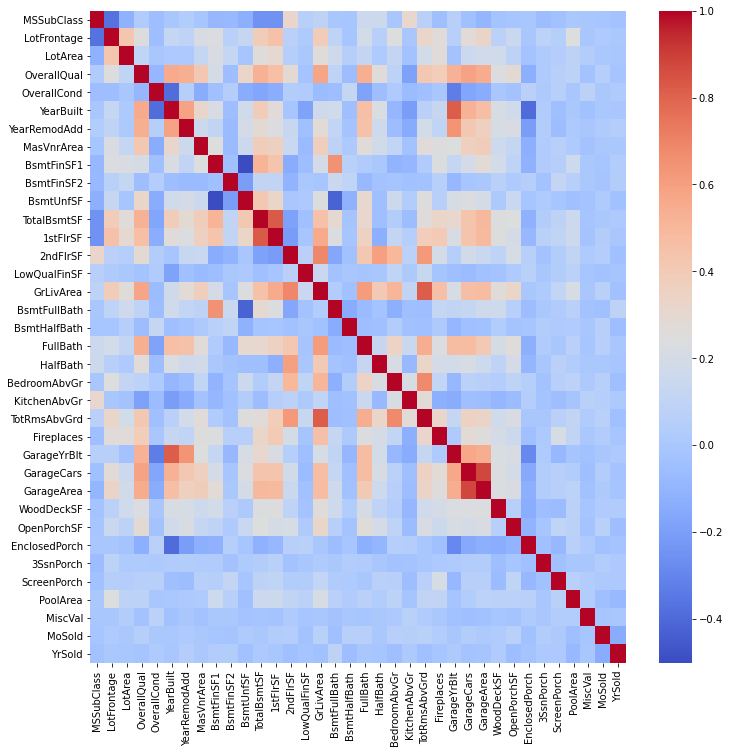

In [49]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_train.corr(), cmap = "coolwarm");

Em particular, podemos olhar a correlação entre as features e o target

In [16]:
# Quais são as features fortemente correlacionadas
corr_feat_target = pd.concat([X_train, y_train], axis = 1).corr()["SalePrice"]

In [17]:
corr_feat_target[corr_feat_target.abs() > 0.65]

OverallQual    0.785555
GrLivArea      0.695652
SalePrice      1.000000
Name: SalePrice, dtype: float64

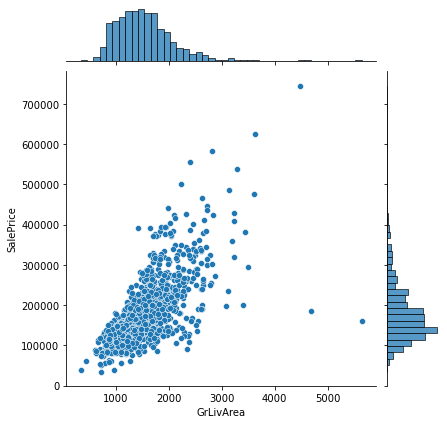

In [18]:
sns.jointplot(x = X_train["GrLivArea"], y = y_train);

Parece que a variável de área construída ("GrLivArea") é uma forte candidata a **explicar** o preço das casas, pois vemos calaramente uma correlação entre as variáveis!

Mas note que há claramente dois outliers... 

In [19]:
indices = X_train.query("GrLivArea > 4500").index

In [20]:
y_train.drop(index = indices, inplace = True)
X_train.drop(index = indices, inplace = True)

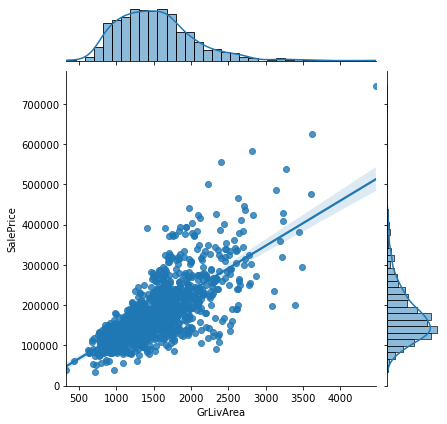

In [39]:
sns.jointplot(x = X_train["GrLivArea"], y = y_train, kind = "reg");

## A hipótese é que a função que descreve é uma linha.

Vamos agora iniciar a construção de um modelo bem simples, que utilize a variável GrLivArea para predizer o preço!

___
___
___

## 2) Regressão linear simples

Apesar de alguns outliers, parece bem adequado que os pontos plotados acima sejam descritos por uma reta, não é mesmo?

Ou, melhor dizendo: **a variável GrLivArea parece estar relacionada ao target SalePrice linearmente!**

Para modelarmos esta relação, vamos conhecer o modelo de **Regressão Linear Simples**.

Como o próprio nome diz, o modelo de Regressão Linear será **uma reta (polinômio linear)**, que melhor se ajusta aos seus dados!

O modelo de **Regressão Linear Simples** será uma linha reta que relaciona Y (o preço da casa) e X (os atributos da casa). 

Se utilizarmos **apenas um atributo** (como, por exemplo, a área construída), temos uma **Regressão Linear Simples**, e nosso modelo é:

$$ \hat{y} = b_0 + b_1 X $$

Neste caso, o modelo tem dois coeficientes (ou **parâmetros**) a serem determinados: $b_0$ (intercepto ou coeficiente linear) e $b_1$ (coeficiente angular). 

A equação acima exprime a **forma funcional** do conjunto de hipóteses com o qual trabalharemos: funções lineares, de uma úniva variável. Isto é,

$$ f_{H, \vec{b}} = b_0 + b_1 X $$

Ou seja,

$$ \mathcal{H} = \{ f_{H, \vec{b}}\} = \{ b_0 + b_1 X \} $$ 

é o conjunto de hipóteses que está sendo considerado, e o vetor de parâmetros é:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1
\end{bmatrix}$$

O **algoritmo de aprendizagem** do estimador é utilizado justamente para encontrarmos os coeficientes $b_0$ e $b_1$ (isto é, o vetor de parâmetros) **que melhor se ajustam aos dados!**

Para fazer isso, pode-se utilizar o método dos **mínimos quadrados** (OLS  - ordinary least squares) ou então o [gradiente descendente](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931).

Vamos conhecer o OLS!

## O algoritmo de aprendizagem da regressão linear

De maneira esquemática, um algoritmo de aprendizagem recebe:

- Um conjunto de hipóteses $\mathcal{H}$;
- Um conjunto de dados de treino $\left(X_i, y_i \right)$

A partir destes inputs, o algoritmo constrói uma **função de perda**, que nada mais é que uma função que contabiliza **os erros cometidos pelo modelo**.

E para sabermos o quanto um modelo está errando é muito simples: basta **compararmos o target predito $\hat{y}$ com o target real $y$**!

Isso pode ser feito de muitas maneiras. A "maneira" específica é o que determina a relação funcional da função de custo de interesse. Para regressão linear, a função de perda mais comum é o **erro quadrático (squared error)**:

$$\text{SE}= (y_i-\hat{y}_i)^2$$

Onde $i = 1, 2, \cdots, n$ é um índice que identifica cada uma das $n$ observações de treino.

Obs.: se tomarmos a média do SE em toda a base de treino, temos o **Mean Squared Error** (MSE):

$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> Quando tomamos a função de erro para uma única observação, a chamamos de **função de perda**. Quando tomamos sua média sobre todo o dataset, a chamamos de **função de custo**. Na prática, os termos são usados como sinônimos (e, pro problema matemático a ser resolvido, tanto faz também).

<img src=https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600368657769-5BJU5FK86VZ6UXZGRC1M/Mean+Squared+Error.png width=400>

Agora, note uma coisa muito importante: **a função de custo é inteiramente dependente da função de hipótese (e, portanto, dos parâmetros!) e dos dados de treino!**

De fato, para a i-ésima observação, $\hat{y}_i = b_0 + b_1 X_i$ (note aqui a dependência da hipótese e dos dados!). Assim,

$$(y_i-\hat{y}_i)^2 = (y_i - (b_0 + b_1 X_i))^2 $$

Por isso, escrevemos a função de custo como $\mathcal{L}_{H, \vec{b}}(X_i, y_i)$, para deixar claro que ela depende tanto dos dados $\left(X_i, y_i \right)$ quando da hipótese parametrizada:

$$\mathcal{L}_{H, \vec{b}}(X_i, y_i) = \sum_{i=1}^n(y_i - (b_0 + b_1 X_i))^2$$


Uma vez que temos uma função de custo, nosso objetivo passa a ser **minimizá-la**. E isso faz total sentido: queremos que nosso modelo, após ter "aprendido", erre o mínimo possível!

Por isso, naturalmente caímos em um **problema de otimização**. Mas, a pergunta que surge é: queremos minimizar o erro **com relação a que?**

Agora, é importante lembrarmos que a **função hipótese é parametrizada**. E é justamente o vetor de parâmetros que determina **a reta que melhor se ajusta aos dados**. 

Assim, podemos resumir o objetivo do algoritmo de aprendizagem como:

> Determinar o vetor de parâmetros que minimiza a função de custo nos dados de treino

E isso faz total sentido, não é mesmo?

E, operacionalmente, isso é justamente o que queremos fazer:

$$\hat{b} = \operatorname*{argmin}_b \left( \mathcal{L}_{H, \vec{b}}(X_i, y_i) \right)$$

Existe uma forma muito conhecida e natural para resolvermos problemas de otimização como este: o famoso "deriva e iguala a 0".

E é exatamente o que o método OLS nos dá: através da otimização explícita da função de custo quadrática, temos uma expressão analítica para os parâmetros:

$$ \left\{\begin{matrix}
\frac{\partial \mathcal{L}}{\partial b_0} = 0\\ 
\frac{\partial \mathcal{L}}{\partial b_1} = 0
\end{matrix}\right. 
\Rightarrow
\left\{\begin{matrix}
\hat{b}_1 = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}\\ 
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}
\end{matrix}\right. \ ,
$$

onde: $\bar{x} = \frac{1}{n} \sum_i x_i$ e $\bar{y} = \frac{1}{n} \sum_i y_i$, são os valores médios da feature e target, respectivamente.

Para quem quiser saber detalhes sobre o procedimento acima, sugiro as referências citadas, ou então [este artigo super simples](https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf).

E esse é o algoritmo de aprendizagem da regressão linear!

_________

In [28]:
# Entendendo o .reshape(-1,1)
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape
(3, 4)

(3, 4)

In [38]:
z.reshape(-1,1) # (linhas, colunas), -1 é usado para se adaptar, (-1,1) é igual a (12,1), no exemplo acima

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

# Passo 1 - construção do modelo

Agora temos os dados, escolhemos o conjunto de hipóteses, e conhecemos também o algoritmo de treinamento da regressão linear!

Felizmente, não precisamos implementar este algoritmo na mão (embora, caso queira, fique à vontade! É um ótimo exercício!)

Aqui na aula, usaremos o sklearn para isso!

Vamos começar?

In [22]:
from sklearn.linear_model import LinearRegression
# lr é o estimador 
lr = LinearRegression()

In [23]:
X_train["GrLivArea"].values.reshape(-1,1)

array([[1314],
       [1571],
       [ 796],
       ...,
       [ 864],
       [1426],
       [1555]], dtype=int64)

In [24]:
# Como só tem uma feature, é preciso usar o reshape(-1,1)
# modelo = lr.fit
lr.fit(X_train["GrLivArea"].values.reshape(-1,1), y_train)

LinearRegression()

In [25]:
# vars retorna o __dict__, ou seja, os atributos e os métodos. 
vars(lr)

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([112.12517083]),
 '_residues': 3269050466968.8315,
 'rank_': 1,
 'singular_': array([17148.49137244]),
 'intercept_': 10895.38004325697}

In [26]:
# Quais são os valores de b^
lr.intercept_, lr.coef_

(10895.38004325697, array([112.12517083]))

Agora que o modelo está treinado, podemos dar uma olhada nos coeficientes que foram encontrados!

Como interpretamos este resultado?

O nosso modelo final é dado por:

$$ \hat{y} = \mathcal{M} = f_{H, \hat{\vec{b}}}(x) =  10895.38 + 112.12 \times \text{GrLiveArea}$$

Isto quer dizer que:

> Aumentando a variável "GrLiveArea" em uma unidade faz com que o preço seja aumentado em USD 112.12!

> O preço mínimo a ser pago, independente da área construída, é de 10895.38!

Podemos visualizar o modelo treinado, neste caso:

É raro que consigamos visualizar nosso modelo final como fizemos acima, mas no caso da regressão linear simples, temos essa sorte! :)

Vamos agora fazer algumas previsões!

Ou ainda:

Pedizendo vários valores de uma vez (muito mais comum)

____________

# Passo 2 - avaliação do modelo

Agora que temos o modelo treinado e algumas previsões, como avaliamos a performance do modelo?

Para isso, podemos dar uma olhada nos **resíduos** das predições! Os resíduos nada mais são do que**os erros do modelo**, ou seja, **a diferença entre cada valor predito e o valor real**, para **os dados de teste!** Isto é,

$$R(y_i) = y_i - \hat{y}_i $$

$$R(y_i) + \hat{y}_i= y_i  $$

$$ \hat{y}_i= y_i - R(y_i)  $$

O caso 100% ideal seria $y_i = \hat{y}_i$, o que produziria uma reta exata!

Quanto mais "espalhados" estiverem os pontos em torno da reta, em geral **pior é o modelo**, pois ele está errando mais!

Uma forma de quantificar isso através de uma métrica conhecida como **$R^2$**, o **coeficiente de determinação**.

Este coeficiente indica **o quão próximos os dados estão da reta ajustada**. Por outro lado, o $R^2$ representa a porcentagem de variação na resposta que é explicada pelo modelo.

$$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

É possível utilizar o $R^2$ nos dados de treino, mas temos que tomar muito cuidado com a forma como interpretaremos esta métrica! Discutiremos mais a diante a importância de calcularmos as métricas de avaliação também na base de treino.

Por enquanto, vamos calcular o $R^2$ nos dados de teste apenas, como faremos a seguir. Essa métrica equivale, portanto, **ao gráfico que fizemos acima!**


In [40]:
from sklearn.metrics import r2_score

r2_score()

<bound method RegressorMixin.score of LinearRegression()>

Outra coisa importante é que os resíduos sejam **normalmente distribuídos**.

Se esse não for o caso, é muito importante que você reveja se o modelo escolhido de fato é adequado ao seu problema!

Além dos resíduos, existem três principais **métricas de avaliação** do modelo de regressão linear:

**Mean Absolute Error** (MAE) é a média do valor absoluto de todos os resíduos (erros):

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando as métricas:

- **MAE** é a mais simples de entender, mas ela penaliza mais erros menores;
- **MSE** é a métrica mais popular, pois essa métrica penaliza mais erros maiores, o que faz mais sentido em aplicações reais.
- **RMSE** é ainda mais popular, pois esta métrica está nas mesmas unidades que o target.

Estas métricas todas podem ser utilizadas como **funções de custo** a serem minimizadas pelo algoritmo do estimador.

Inclusive, já conhecemos uma delas: O MSE, que é usado como função de custo para o OLS!

Vamos dar uma olhada em tudo junto:


Vamos fazer algumas mudanças?

___
___
___

## 3) Regressão linear múltipla

O modelo que fizemos acima considera uma única feature como preditora do preço da casa.

Mas temos outras 78 dessas features! Será que não há mais informação útil em todas essas outras variáveis?

Em geral, sim! É natural que esperemos que **mais variáveis** tragam **mais informações** ao modelo, e, portanto, o torne mais preciso!

Para incorporar estas outras variáveis ao modelo, é muito simples! 

Podemos passar a utilizar outros atributos (como o número de cômodos, qual é a renda média da vizinhança, etc.), e neste caso teremos uma **Regressão Linear Múltipla**, que é expressa pela seguinte função de hipótese:

$$ \hat{y} = f_{H, \vec{b}} = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_n X_n $$

Neste caso, além de $b_0$ e $b_1$, temos também outros coeficientes, um pra cada uma das $n$ features que escolhermos! Ou seja, o vetor de parâmetros tem $n+1$ dimensões:

$$\vec{b} = \begin{bmatrix}
b_0\\ 
b_1\\
\vdots\\
b_n
\end{bmatrix}$$

Modelos de regressão múltipla são potencialmente mais precisos, mas há também um lado ruim: nós perdemos a **possibilidade de visualização**. Agora, não temos mais uma reta, mas sim um **hiperplano** que relaciona todas as features com o target!

<img src="https://miro.medium.com/max/1120/0*rGSfRsMjiQeG5jof.png" width=500>

O OLS também é válido para a regressão linear múltipla, mas o fato de termos muitas variáveis faz com que os cálculos do problema de otimização sejam consideravelmente mais complicados.

Para facilitar este procedimento, é muito comum utilizarmos uma **notação matricial**, que facilita muitíssimo o cálculo do problema de otimização. Para os interessados, sugiro as referências, ou então [esta lecture](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf).

Vamos construir esse modelo na prática com o sklearn!

Observação: a coluna "Id" traz apenas um número de identificação arbitrário que não deve ser correlacionado com o target. Portanto, vamos desconsiderar esta coluna de nosso modelo!

Também é possível calcularmos as métricas de performance na base de treino, mas temos que tomar muito cuidado ao interpretar estas medidas!

Mais adiante falaremos sobre overfitting, e este ponto ficará mais claro.

Comparando:

```
Métricas de avaliação (dados de teste):

R^2: 0.8563506695017936
MAE: 20734.90415410572
MSE: 793479736.8905219
RMSE: 28168.772371023235
```

```
Métricas de avaliação (dados de treino):

R^2: 0.8616841881921395
MAE: 20508.039034548918
MSE: 900886802.9866579
RMSE: 30014.776410739058
```

Vamos olhar para os parâmetros do modelo:

É possível interpretar os parâmetros e atribuir uma "importância" de cada feature ao valor do respectivo parâmetro. Mas, cuidado: essa análise é afetada pela escala das features! Veja:

Uma forma de eliminarmos o efeito da escala, é **escalando os dados** (um pré-processamento).

Isso pode ser visto como uma terceira passada no ciclo.

A performance do modelo melhorou?

Será que dá pra melhorar mais?

Opções:

- tentar apenas um subconjunto de features: **feature selection**


- passar a utilizar as features categóricas: **feature engeneering**

____
____
____

## 4) Overfitting: um dos lados do tradeoff viés-variância

O famoso **tradeoff viés-variância** é um dos conceitos mais importantes em apredizado de maquina.

Muitas vezes alguns modelos têm 100% de acerto nos dados de **treino**, mas **na base de teste** a performance cai para menos de 50%.

Isso pode acontecer porque o modelo fica **especialista apenas no conjunto de treino**, não conseguindo **generalizar os padrões para além dos dados vistos**. 

Quando isso ocorre, dizemos que nosso modelo sofre de **overfitting**.

<img src="https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width=800>

O overfitting está intimamente ligado com o conceito de **viés** (bias) e **variância** (variance):

>**Viés**<br>
É a diferença entre o que o modelo prediz, e o valor correto a ser predito.<br>
Modelos com alto viés são muito simples, de modo a **não conseguir capturar as relações que os dados de treino exibem** (underfit).<br>
Issso faz com que ambos os erros de treino e de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo de capturar a verdadeira relação entre features e target**


> **Variância**<br>
Variância se refere à variabilidade das predições de um modelo.<br>
Modelos com alta variância são muito complexos, por **aprenderem demais as relações  exibidas nos dados de treino** (overfit).<br>
Isso faz com que os erros de treino sejam baixos, mas os erros de teste sejam altos.
<br><br>
Em outras palavras:<br>
**Incapacidade de um modelo performar bem em outros datasets diferentes do usado no treinamento**. 

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=500>

<img src="https://miro.medium.com/max/1494/1*C7ZKM93QVdpeSCGbF5TjIg.png" width=800>

Para demonstrar overfit ser usado o conjuto de teste [anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

Vamos supor que este dado represente valores de medições de um sensor, porém o sensor teve um pequeno problema durante a medição.

Podemos perceber facilmente qual é este erro, e qual seria a função de regreesão para este sensor com os dados validos: **regressão linear**.

Perceba que a função linear encontrar já aprensenta um padrão muito similiar aos dados, porém um ponto error faz com que ela não tenha um resultado otimo.

Podemos utilizar regressões polinomiais, que possuem ordem maiores que 1, para tentar diminuir o erro da regressão. Por exemplo, podemos considerar um polinômio de grau 6,

$$\hat{y}_{i} = \beta_{1} + \beta_{2} x_{i} + \beta_{3} {x_{i}}^{2} + \cdots + \beta_{6} {x_{i}}^{6}$$

Para criar modelos polinomiais com o sklearn, [dê uma olhada aqui](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Mas, teremos uma aula sobre isso, logo logo!

Ao utilizarmos uma regressão de ordem 6 percebemos que ela se ajusta ao valor com erro, porém ela **se distancia da regressão que realmente representa os dados**. 

Tentar **aprender o erro faz com ela com ela não aprenda a função real**. 

Isto acontece pois ela se **super ajustou aos dados de treino, se distanciando dos dados reais**. 

__Como garantir que nosso modelo não está sofrendo de overfitting?__

Naturalmente, essa é uma pergunta de extrema importância, especialmente no contexto de **redes neurais**. [Veja aqui](https://towardsdatascience.com/8-simple-techniques-to-prevent-overfitting-4d443da2ef7d) e [aqui](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) algumas discussões.

Na prática: **jamais se apegue à peformance de treino como forma de avaliar o modelo!** O que queremos otimizar sempre será a performance **avaliada nos dados de teste**, isto é, a **performance de generalização** do modelo. 

Assim, é **avaliando o modelo nos dados de teste** que garantimos que uma boa performance não é produto do overfitting!

Mais a diante, discutiremos overfitting e o tradeoff viés/variância em detalhes. Por enquanto, uma boa prática é comparar as métricas de treino com as métricas de teste, conforme fizemos acima. Isso nos permite avaliar, de maneira rápida e simples, se houve underfitting!